In [22]:
import pandas as pd

# Load the CSV file
file_path = '/content/query_execution_time_Maintaince.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,User ID,Query Number,Execution Time (seconds)
0,3,1,4.24434757232666
1,1,11,5.923672199249268
2,2,12,8.779862642288208
3,4,10,11.027557373046875
4,4,14,6.650636911392212


In [23]:
# Convert 'Execution Time (seconds)' to numeric for calculation
df['Execution Time (seconds)'] = pd.to_numeric(df['Execution Time (seconds)'], errors='coerce')

# Group by 'Query Number' and calculate the mean execution time
average_execution_time = df.groupby('Query Number')['Execution Time (seconds)'].mean()

# Display the result
average_execution_time.reset_index()


,Query Number,Execution Time (seconds)
0,1,7.188780
1,10,13.678621
2,11,7.040100
3,12,11.129269
4,13,12.250259
...,...,...
93,96,12.170731
94,97,17.246764
95,98,12.602677
96,99,11.222734


In [24]:
# Load the second CSV file
file_path_2 = '/content/query_execution_time.csv'
df_2 = pd.read_csv(file_path_2)

# Display the first few rows of the dataframe
df_2.head()


,3,26,7.307246685028076
0,User ID,Query Number,Execution Time (seconds)
1,1,1,5.303536415100098
2,3,11,7.550448656082153
3,4,12,9.111189603805542
4,2,10,10.344279527664185


In [25]:
# Reload the CSV file, including the first row as data
df_2 = pd.read_csv(file_path_2, header=None, names=['User ID', 'Query Number', 'Execution Time (seconds)'])

# Convert 'Execution Time (seconds)' to numeric for calculation
df_2['Execution Time (seconds)'] = pd.to_numeric(df_2['Execution Time (seconds)'], errors='coerce')

# Group by 'Query Number' and calculate the mean execution time
average_execution_time_2 = df_2.groupby('Query Number')['Execution Time (seconds)'].mean()

# Display the result
average_execution_time_2.reset_index()


,Query Number,Execution Time (seconds)
0,1,5.633119
1,10,9.160567
2,11,6.116517
3,12,9.587597
4,13,8.241019
...,...,...
93,96,10.667953
94,97,14.766269
95,98,11.235143
96,99,10.798317


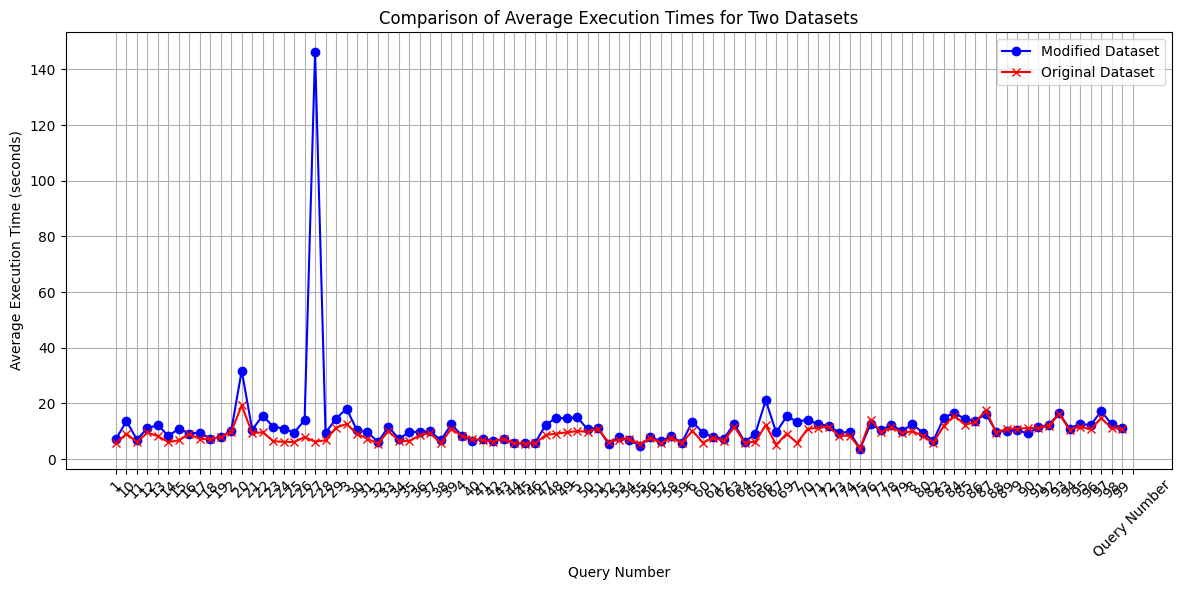

In [26]:
import matplotlib.pyplot as plt

# Prepare the data for plotting
merged_data = pd.merge(average_execution_time.reset_index(), average_execution_time_2.reset_index(),
                       on='Query Number', how='outer', suffixes=('_1', '_2'))

# Plotting
plt.figure(figsize=(12, 6))

# First dataset
plt.plot(merged_data['Query Number'], merged_data['Execution Time (seconds)_1'],
         label='Original Dataset', marker='o', color='blue')

# Second dataset
plt.plot(merged_data['Query Number'], merged_data['Execution Time (seconds)_2'],
         label='Modified Dataset', marker='x', color='red')

# Adding labels, title and legend
plt.xlabel('Query Number')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Comparison of Average Execution Times for Two Datasets')
plt.legend()

# Making the plot look academic and professional
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


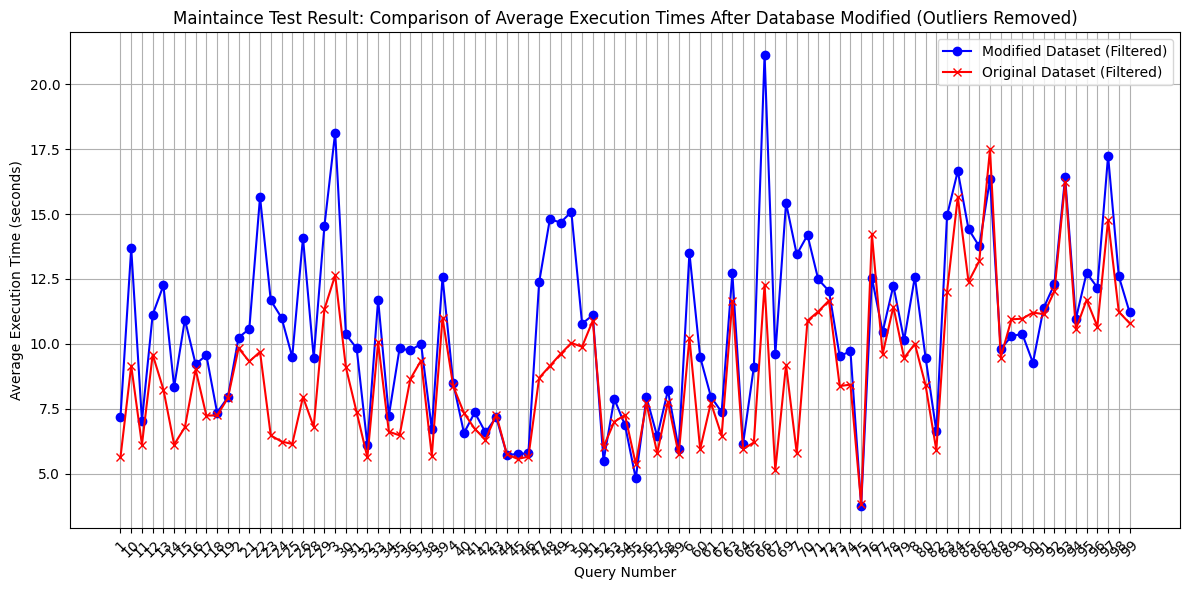

In [30]:
# Calculate mean and standard deviation for both datasets
mean_1 = merged_data['Execution Time (seconds)_1'].mean()
std_1 = merged_data['Execution Time (seconds)_1'].std()

mean_2 = merged_data['Execution Time (seconds)_2'].mean()
std_2 = merged_data['Execution Time (seconds)_2'].std()

# Define thresholds for outliers (commonly used threshold is mean ± 3*std)
threshold_1 = mean_1 + 3 * std_1
threshold_2 = mean_2 + 3 * std_2

# Removing outliers
filtered_data = merged_data[(merged_data['Execution Time (seconds)_1'] <= threshold_1) &
                            (merged_data['Execution Time (seconds)_2'] <= threshold_2)]

# Plotting the filtered data
plt.figure(figsize=(12, 6))

# First dataset
plt.plot(filtered_data['Query Number'], filtered_data['Execution Time (seconds)_1'],
         label='Modified Dataset (Filtered)', marker='o', color='blue')

# Second dataset
plt.plot(filtered_data['Query Number'], filtered_data['Execution Time (seconds)_2'],
         label='Original Dataset (Filtered)', marker='x', color='red')

# Adding labels, title, and legend
plt.xlabel('Query Number')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Maintaince Test Result: Comparison of Average Execution Times After Database Modified (Outliers Removed)')
plt.legend()

# Making the plot look academic and professional
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()
